## Multivariate Linear Regression, Non-Parametric Models and Cross-Validation

**Name:** Mandeep Singh Brar        
**Student Id:** 8989367     
**Course Name:** Foundations of Machine Learning Frameworks     
**Course Code:** CSCN8010       

#### **Importing Required Libraries**

 - pandas - Work with data in a readable, tabular format (DataFrame)
 - scikit-learn	- Load the diabetes dataset for use in regression and ML tasks

In [21]:
# Import required libraries
import pandas as pd
from sklearn import datasets

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


## **Part 1**

###  **1. Get the Data**

In [22]:
# Load the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Full DataFrame with features and target
diabetes_data = diabetes.frame

# Separate features (X) and target (y)
feature_diabetes_data = diabetes.data
target_diabetes_data = diabetes.target

# Preview the dataset
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


**Diabetes Dataset Overview**

- **Source**: Built-in dataset from Scikit-Learn.
- **Use Case**: Predicting the progression of diabetes one year after baseline.
- **Samples**: 442 patient records.
- **Features**: 10 continuous, standardized features:
  - `age`: Age of the patient  
  - `sex`: Sex of the patient  
  - `bmi`: Body Mass Index  
  - `bp`: Average blood pressure  
  - `s1` to `s6`: Various blood serum measurements  
- **Target**:  
  - A quantitative measure of disease progression (numeric value).
  - Column name: `target`

### **2. Frame the Problem**

**Objective:** Predict the diabetes progression in patients based on one year after baseline. 

**Problem Type**

- Type: Supervised Learning  
- Category: Regression  
- Target Variable: `target`
- Input Features: 10 continuous, standardized medical features

**Use Case:**       
A smart tool that helps doctors spot patients who are likely to see their diabetes worsen within a year—based on routine check-up data. This lets them step in early with the right care, improving outcomes and preventing complications.



### **3. EDA**

I am exploring the dataset to have a detail understanding on its structure and basic patterns of the dataset. 

---

**Step 3.1 : Describe the Data**

In [23]:
# Check dataset dimensions
print("Dataset Dimensions (rows, columns):",  diabetes_data.shape)


Dataset Dimensions (rows, columns): (442, 11)


In [24]:
# View column names and data types
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


---
**Step 3.2 : Descriptive Statistics**

In [25]:
# Descriptive statistics of all columns
print("Descriptive Statistics of the Diabetes Dataset:\n")

diabetes_data.describe().T  # .T transposes the output for better readability

Descriptive Statistics of the Diabetes Dataset:



,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


**Describe**

The dataset contains the 440 samples and contains the 10 different features name as: `age`, `sex`, `bmi`, `bp`, `s1`, `s2`, `s3`, `s4`, `s5`, `s6`

The `target` feature stats:
- Mean -> 152.13
- Standard Deviation -> 77.09
- Range -> 25 - 346

---

**Step 3.3 : Finding the correlation with Target**

In [26]:
# Calculate correlation matrix
correlation_matrix = diabetes_data.corr()

# Extract correlation of target with all other variables, excluding itself
target_correlations = correlation_matrix['target'].drop('target').sort_values(ascending=False)

# Convert to DataFrame for clean display
target_correlation_diabetes_data = target_correlations.to_frame(name='Correlation with Target')

# Display the result
print("Correlation of Target Variable with Other Features:\n")
target_correlation_diabetes_data

Correlation of Target Variable with Other Features:



,Correlation with Target
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062
s3,-0.394789


**Correlation of Features with Target Variable**

This table displays the correlation values between each feature and the target variable (`target`), which represents diabetes progression one year after baseline.

**Purpose:**

Identifying the most strongly correlated features helps in:
- **Feature selection** for modeling
- Understanding **predictive relationships**
- Guiding **exploratory analysis**

Features like BMI, S5, BP and S4 show stronger correlations with the target, making them potential key predictors for building regression models.

---

**Step 3.4 : Correlation Matrix Heatmap**

I have create a heatmap to display all the features that are corelated to each other and the target.

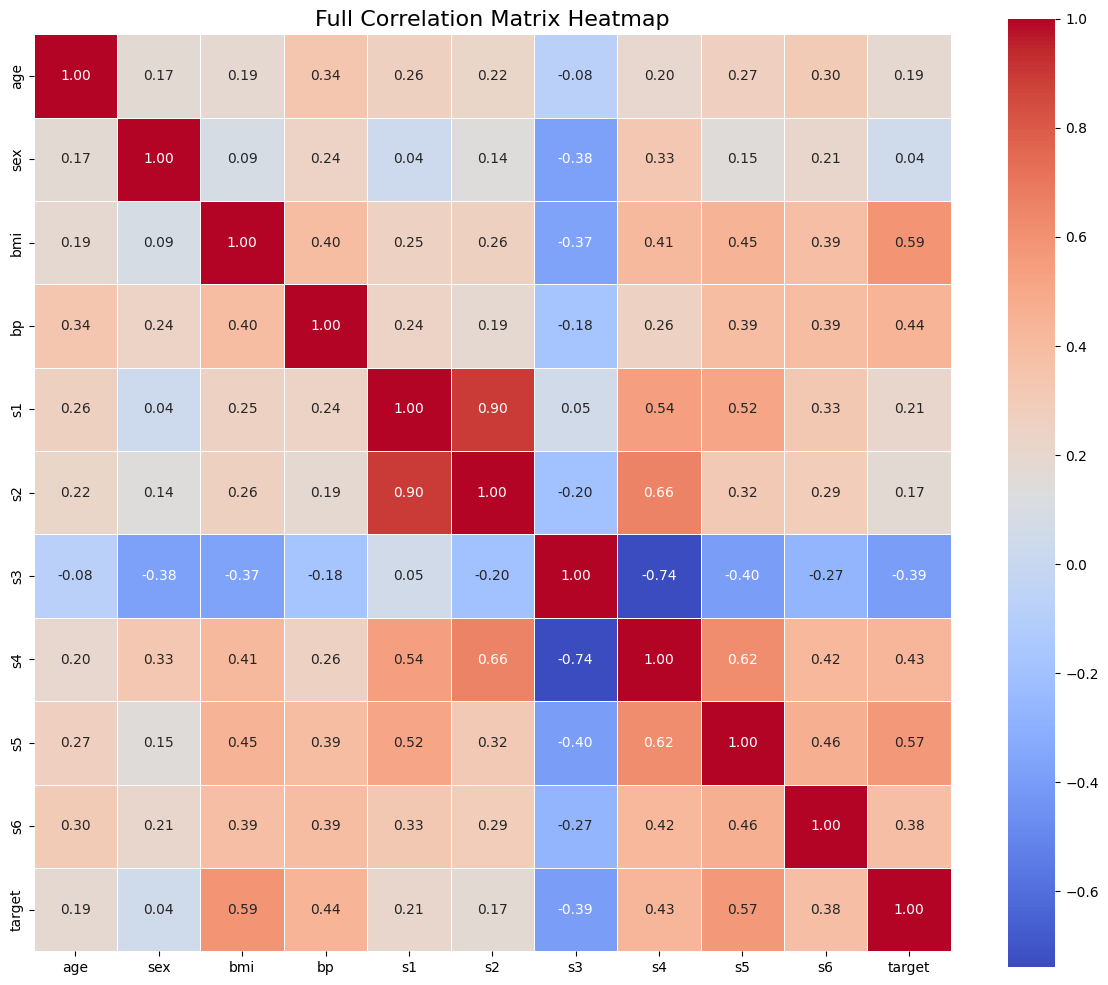

In [27]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(diabetes_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Full Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

---

**Step 3.5 : Scatter Plot**

The following scatter plots visualize the relationships between the **top 4 features most strongly correlated** with the target variable (`target`), which represents diabetes disease progression after one year. Each point represents an individual patient.


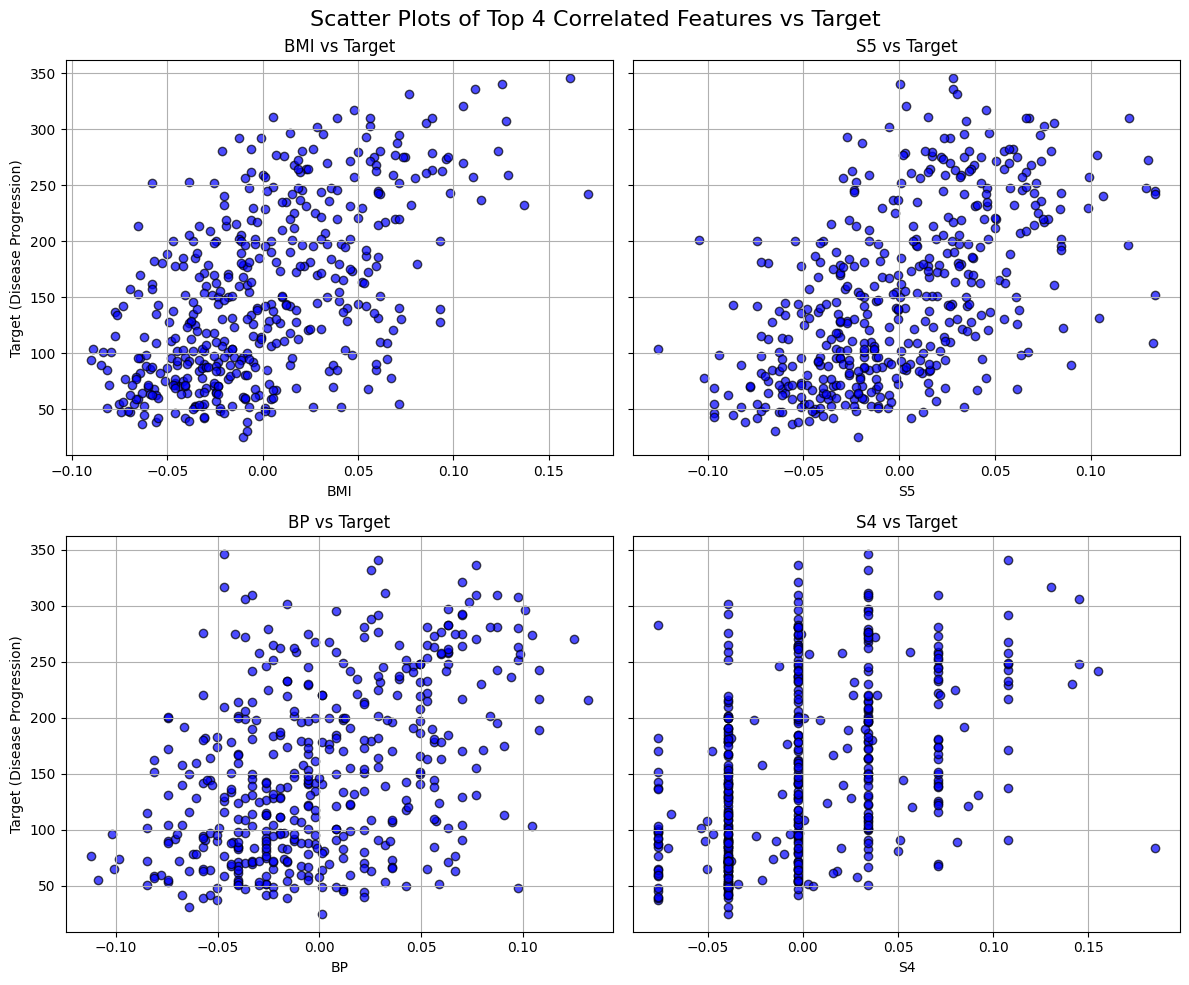

In [28]:
top_4_features = diabetes_data.corr()['target'].drop('target').abs().sort_values(ascending=False).head(4).index.tolist()

# layout for 4 scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature against the target using blue circles with black edges
for ax, feature in zip(axes, top_4_features):
    ax.scatter(diabetes_data[feature], diabetes_data['target'], marker='o', color='blue', edgecolors='black', alpha=0.7)
    ax.set_title(f"{feature.upper()} vs Target")
    ax.set_xlabel(feature.upper())
    ax.grid(True)

# Set the common y-axis label
axes[0].set_ylabel("Target (Disease Progression)")
axes[2].set_ylabel("Target (Disease Progression)")

# Overall title
fig.suptitle("Scatter Plots of Top 4 Correlated Features vs Target", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()



---

**Step 3.6 : Histogram**

These histograms show the distribution of the four features most strongly correlated with the target variable (diabetes progression). The histograms help us understand how each feature is distributed across the dataset.


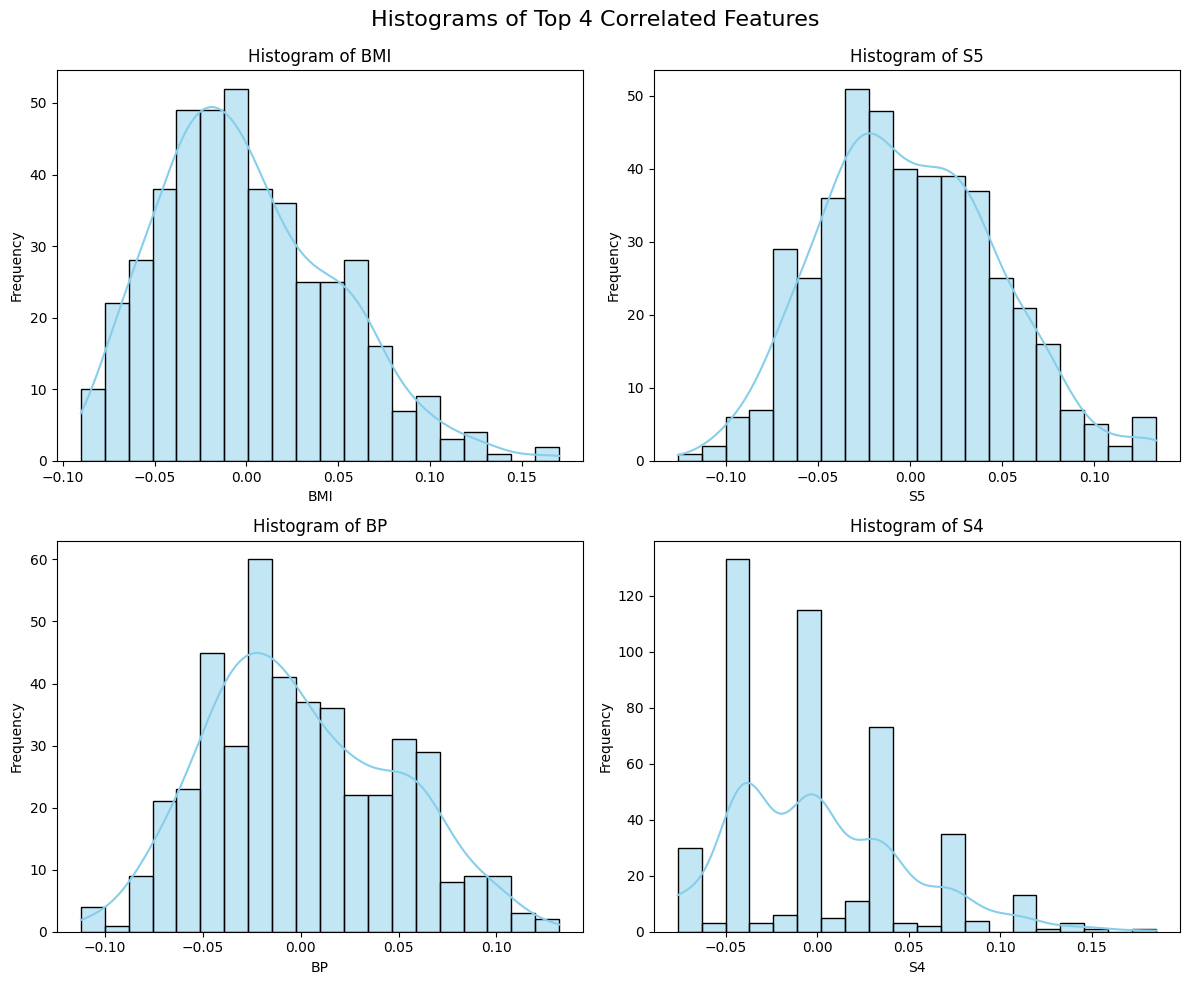

In [29]:
# Create histograms for only the top 4 correlated features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(top_4_features):
    sns.histplot(diabetes_data[feature], bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Histogram of {feature.upper()}")
    axes[i].set_xlabel(feature.upper())
    axes[i].set_ylabel("Frequency")

# Overall title and layout
fig.suptitle("Histograms of Top 4 Correlated Features", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

**Step 3.6.1: Histogram for Target Variable Only**

This plot shows the distribution of the target variable, which represents the disease progression after one year.


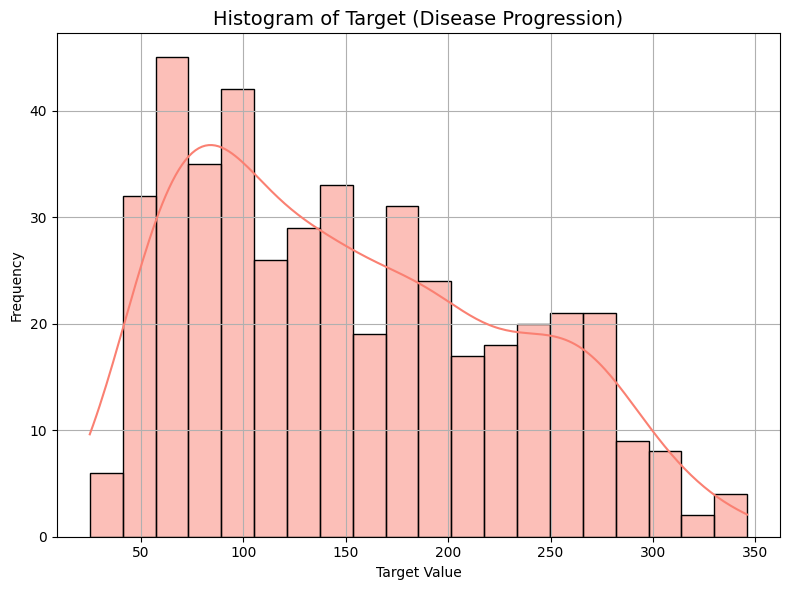

In [30]:
# Separate histogram for the target variable
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_data['target'], bins=20, kde=True, color='salmon')
plt.title("Histogram of Target (Disease Progression)", fontsize=14)
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations:**

- The distribution is slightly **right-skewed**, suggesting more patients have lower progression values, while a few exhibit more severe outcomes.
- The spread of the values informs us of the **range and variance** in the target that the model will need to learn.

This visualization highlights the importance of building a regression model capable of capturing not only central trends but also extreme values.

---

**Step 3.7 : Box Plots**

I have used the box plots to detect the outliers in each of the four top features. The outliers can effect the regression model later on so i have to find the outliers. 

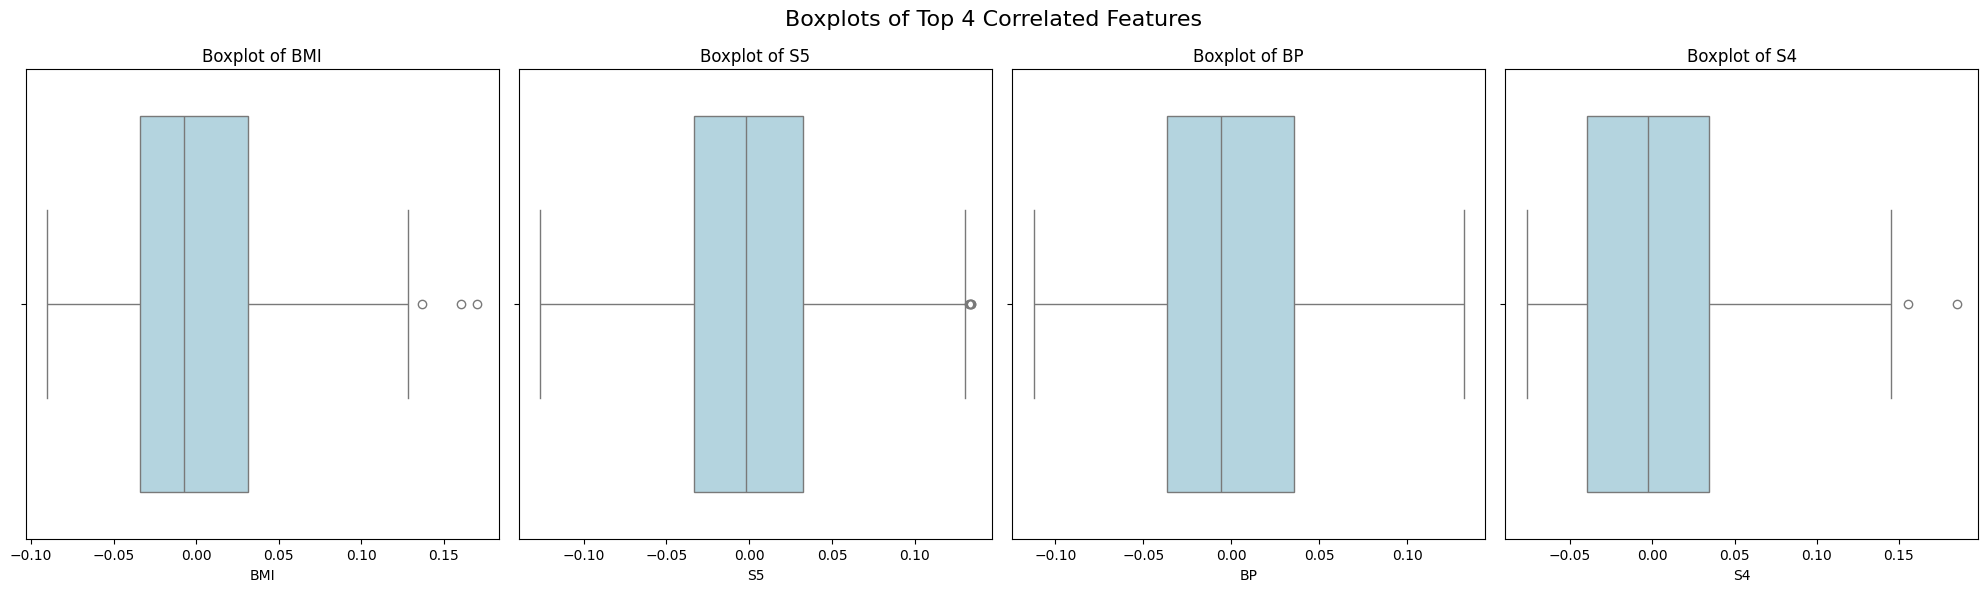

In [31]:
# Create a layout for 4 boxplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
axes = axes.flatten()

# Plot each of the top 4 correlated features
for i, feature in enumerate(top_4_features):
    sns.boxplot(x=diabetes_data[feature], color='lightblue', ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature.upper()}")
    axes[i].set_xlabel(feature.upper())

# Adjust spacing and add overall title
fig.suptitle("Boxplots of Top 4 Correlated Features", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

### **4. Cleaning the data(if needed)**

I am going to check the data for `missing values`, `dupilcate values` and `constant (zero-variance)`. Then, I will move forward for creating the training models. 

After checking, it will confirm that dataset needs any cleaning. 

In [32]:
# Check for missing values
missing_values = diabetes_data.isnull().sum()

# Display only columns with missing values
print("Missing values per column:\n")
print(missing_values)

# Check for duplicate rows
duplicate_count = diabetes_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


# Remove duplicates if any (optional, none expected in this dataset)
diabetes_data = diabetes_data.drop_duplicates()

print("\n")
# Find columns with zero variance (i.e., same value in all rows)
zero_variance = diabetes_data.loc[:, diabetes_data.nunique() == 1]

# Display the result
if zero_variance.empty:
    print("No constant (zero-variance) features found.")
else:
    print("Zero-variance features found:\n", zero_variance.columns.tolist())


Missing values per column:

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Number of duplicate rows: 0


No constant (zero-variance) features found.


**Data Cleaning Summary**

After checking everything, Their are `no missing values`, `no duplicate rows` and `no constant columns`. 

So that, the dataset is from `scikit-learn`, its already `cleaned and standardized` for the next steps. 

Now, I can split the data for the next steps. 

### **Step 5 : Split the dataset to a train (75%) and validation set (10%), and test set (15%).**

We have to split the dataset into three parts:
   - **Training set:** Used to fit the model.
   - **Validation set:** Used to tune and evalute during training. 
   - **Test set:** Used only at the end for final model evaluation. 

In [ ]:
# Step 1: Separate features and target
X = diabetes_data.drop(columns='target')   # Features
y = diabetes_data['target']                # Target

# Step 2: Split off 15% test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

# Step 3: From the remaining 85%, split ~11.76% for validation (10% of original)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1176, random_state=42)

# Confirm split sizes
print("Training set size: 75%    ", X_train.shape[0])
print("Validation set size: 10%  ", X_val.shape[0])
print("Test set size: 15%        ", X_test.shape[0])


Training set size: 75%     330
Validation set size: 10%   45
Test set size: 15%         67
